<a href="https://colab.research.google.com/github/UCLM-ESI-NECULA/DataMining/blob/master/Statement3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!rm -rf sample_data/

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
from matplotlib.ticker import MaxNLocator
from scipy.stats import pearsonr, spearmanr
import numpy as np


# Df4


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/mycolab/clean/Cleaned_DS4-ComercioExterior", sep='|', decimal='.')


data['PRODUCT'] = data['PRODUCT'].str.replace(r'\(.*\)', '', regex=True)
data['PRODUCT'] = data['PRODUCT'].str.split(',').str[0]


data.head()


,PERIOD,REPORTER,PRODUCT,EXPORT_QUANTITY_IN_100KG,EXPORT_VALUE_IN_EUROS,IMPORT_QUANTITY_IN_100KG,IMPORT_VALUE_IN_EUROS
0,2018-01-01,Austria,Bananas,0.0,0.0,0.0,0.0
1,2018-01-01,Austria,Bananas,0.0,0.0,2.0,529.0
2,2018-01-01,Austria,Brussels sprouts,0.0,0.0,0.0,0.0
3,2018-01-01,Austria,Brussels sprouts,0.0,0.0,0.0,0.0
4,2018-01-01,Austria,Cucumbers,0.0,0.0,14677.0,2294716.0


In [ ]:
#Categorizing the products

product_list = data["PRODUCT"].unique()

fruits = ['Bananas', 'Currants', 'Dried apples','Dried apricots','Dried grapes ',
          'Dried pawpaws', 'Dried peaches', 'Dried pears', 'Dried prunes',
          'Fresh apples ', 'Fresh apricots', 'Fresh blackberries', 'Fresh blackcurrants',
          'Fresh cherries ', 'Fresh durians', 'Fresh figs', 'Fresh grapes ', 'Fresh kiwifruit',
          'Fresh melons ', 'Fresh navel oranges', 'Fresh nectarines',
          'Fresh or dried avocados', 'Fresh or dried citrus fruit ',
          'Fresh or dried clementines incl. monreales', 'Fresh or dried dates',
          'Fresh or dried grapefruit', 'Fresh or dried guavas',
          'Fresh or dried lemons "Citrus limon', 'Fresh or dried limes "Citrus aurantifolia',
          'Fresh or dried mandarins incl. tangerines ', 'Fresh or dried pineapples',
          'Fresh or dried satsumas', 'Fresh pawpaws "papayas"', 'Fresh peaches ',
          'Fresh pears ', 'Fresh persimmons', 'Fresh plums', 'Fresh quinces',
          'Fresh raspberries', 'Fresh redcurrants', 'Fresh sloes',
          'Fresh sour cherries "Prunus cerasus"', 'Fresh strawberries',
          'Fresh sweet oranges ', 'Fresh table grapes', 'Fresh watermelons',
          'Fresh white oranges', 'Plantains', 'Sultanas']


vegetables = ['Brussels sprouts','Cucumbers','Fresh or chilled asparagus',
              'Fresh or chilled aubergines "eggplants"','Fresh or chilled beans "Vigna spp.',
              'Fresh or chilled cabbage lettuce', 'Fresh or chilled capers',
              'Fresh or chilled carrots and turnips', 'Fresh or chilled cauliflowers and headed broccoli',
              'Fresh or chilled celery ', 'Fresh or chilled chanterelles',
              'Fresh or chilled chicory ', 'Fresh or chilled courgettes',
              'Fresh or chilled edible mushrooms ', 'Fresh or chilled fennel',
              'Fresh or chilled flap mushrooms','Fresh or chilled fruits of genus Capsicum or Pimenta ',
              'Fresh or chilled gherkins', 'Fresh or chilled globe artichokes',
              'Fresh or chilled leguminous vegetables', 'Fresh or chilled lettuce ',
              'Fresh or chilled mushrooms of the genus "Agaricus"',
              'Fresh or chilled new potatoes from 1 January to 30 June',
              'Fresh or chilled olives ', 'Fresh or chilled olives for oil production',
              'Fresh or chilled peas "Pisum sativum"', 'Fresh or chilled spinach',
              'Fresh or chilled sweet peppers', 'Fresh or chilled sweetcorn',
              'Fresh or chilled truffles', 'Fresh or chilled witloof chicory',
              'Garlic', 'Onions','Potatoes', 'Potatoes for manufacture of starch', 'Shallots',
              'Tomatoes','White and red cabbages']

def categorize_products(product):
  if product in fruits:
    return "FRUIT"
  else:
    return "VEGETABLE"

data['CATEGORY'] = data['PRODUCT'].apply(categorize_products)

# data = data.reindex(columns=['YEAR', 'MONTH', 'REPORTER',	'PRODUCT', 'CATEGORY', 'EXPORT_QUANTITY_IN_100KG', 'EXPORT_VALUE_IN_EUROS', 'IMPORT_QUANTITY_IN_100KG', 'IMPORT_VALUE_IN_EUROS'])
data = data.reindex(columns=['PERIOD', 'REPORTER',	'PRODUCT', 'CATEGORY', 'EXPORT_QUANTITY_IN_100KG', 'EXPORT_VALUE_IN_EUROS', 'IMPORT_QUANTITY_IN_100KG', 'IMPORT_VALUE_IN_EUROS'])
data.head()


,PERIOD,REPORTER,PRODUCT,CATEGORY,EXPORT_QUANTITY_IN_100KG,EXPORT_VALUE_IN_EUROS,IMPORT_QUANTITY_IN_100KG,IMPORT_VALUE_IN_EUROS
0,2018-01-01,Austria,Bananas,FRUIT,0.0,0.0,0.0,0.0
1,2018-01-01,Austria,Bananas,FRUIT,0.0,0.0,2.0,529.0
2,2018-01-01,Austria,Brussels sprouts,VEGETABLE,0.0,0.0,0.0,0.0
3,2018-01-01,Austria,Brussels sprouts,VEGETABLE,0.0,0.0,0.0,0.0
4,2018-01-01,Austria,Cucumbers,VEGETABLE,0.0,0.0,14677.0,2294716.0


#Our statement

The import of fruits and vegetables in Spain during COVID-19 decreased compared to the previous years.
These fewer imports lead to an increase in the price.

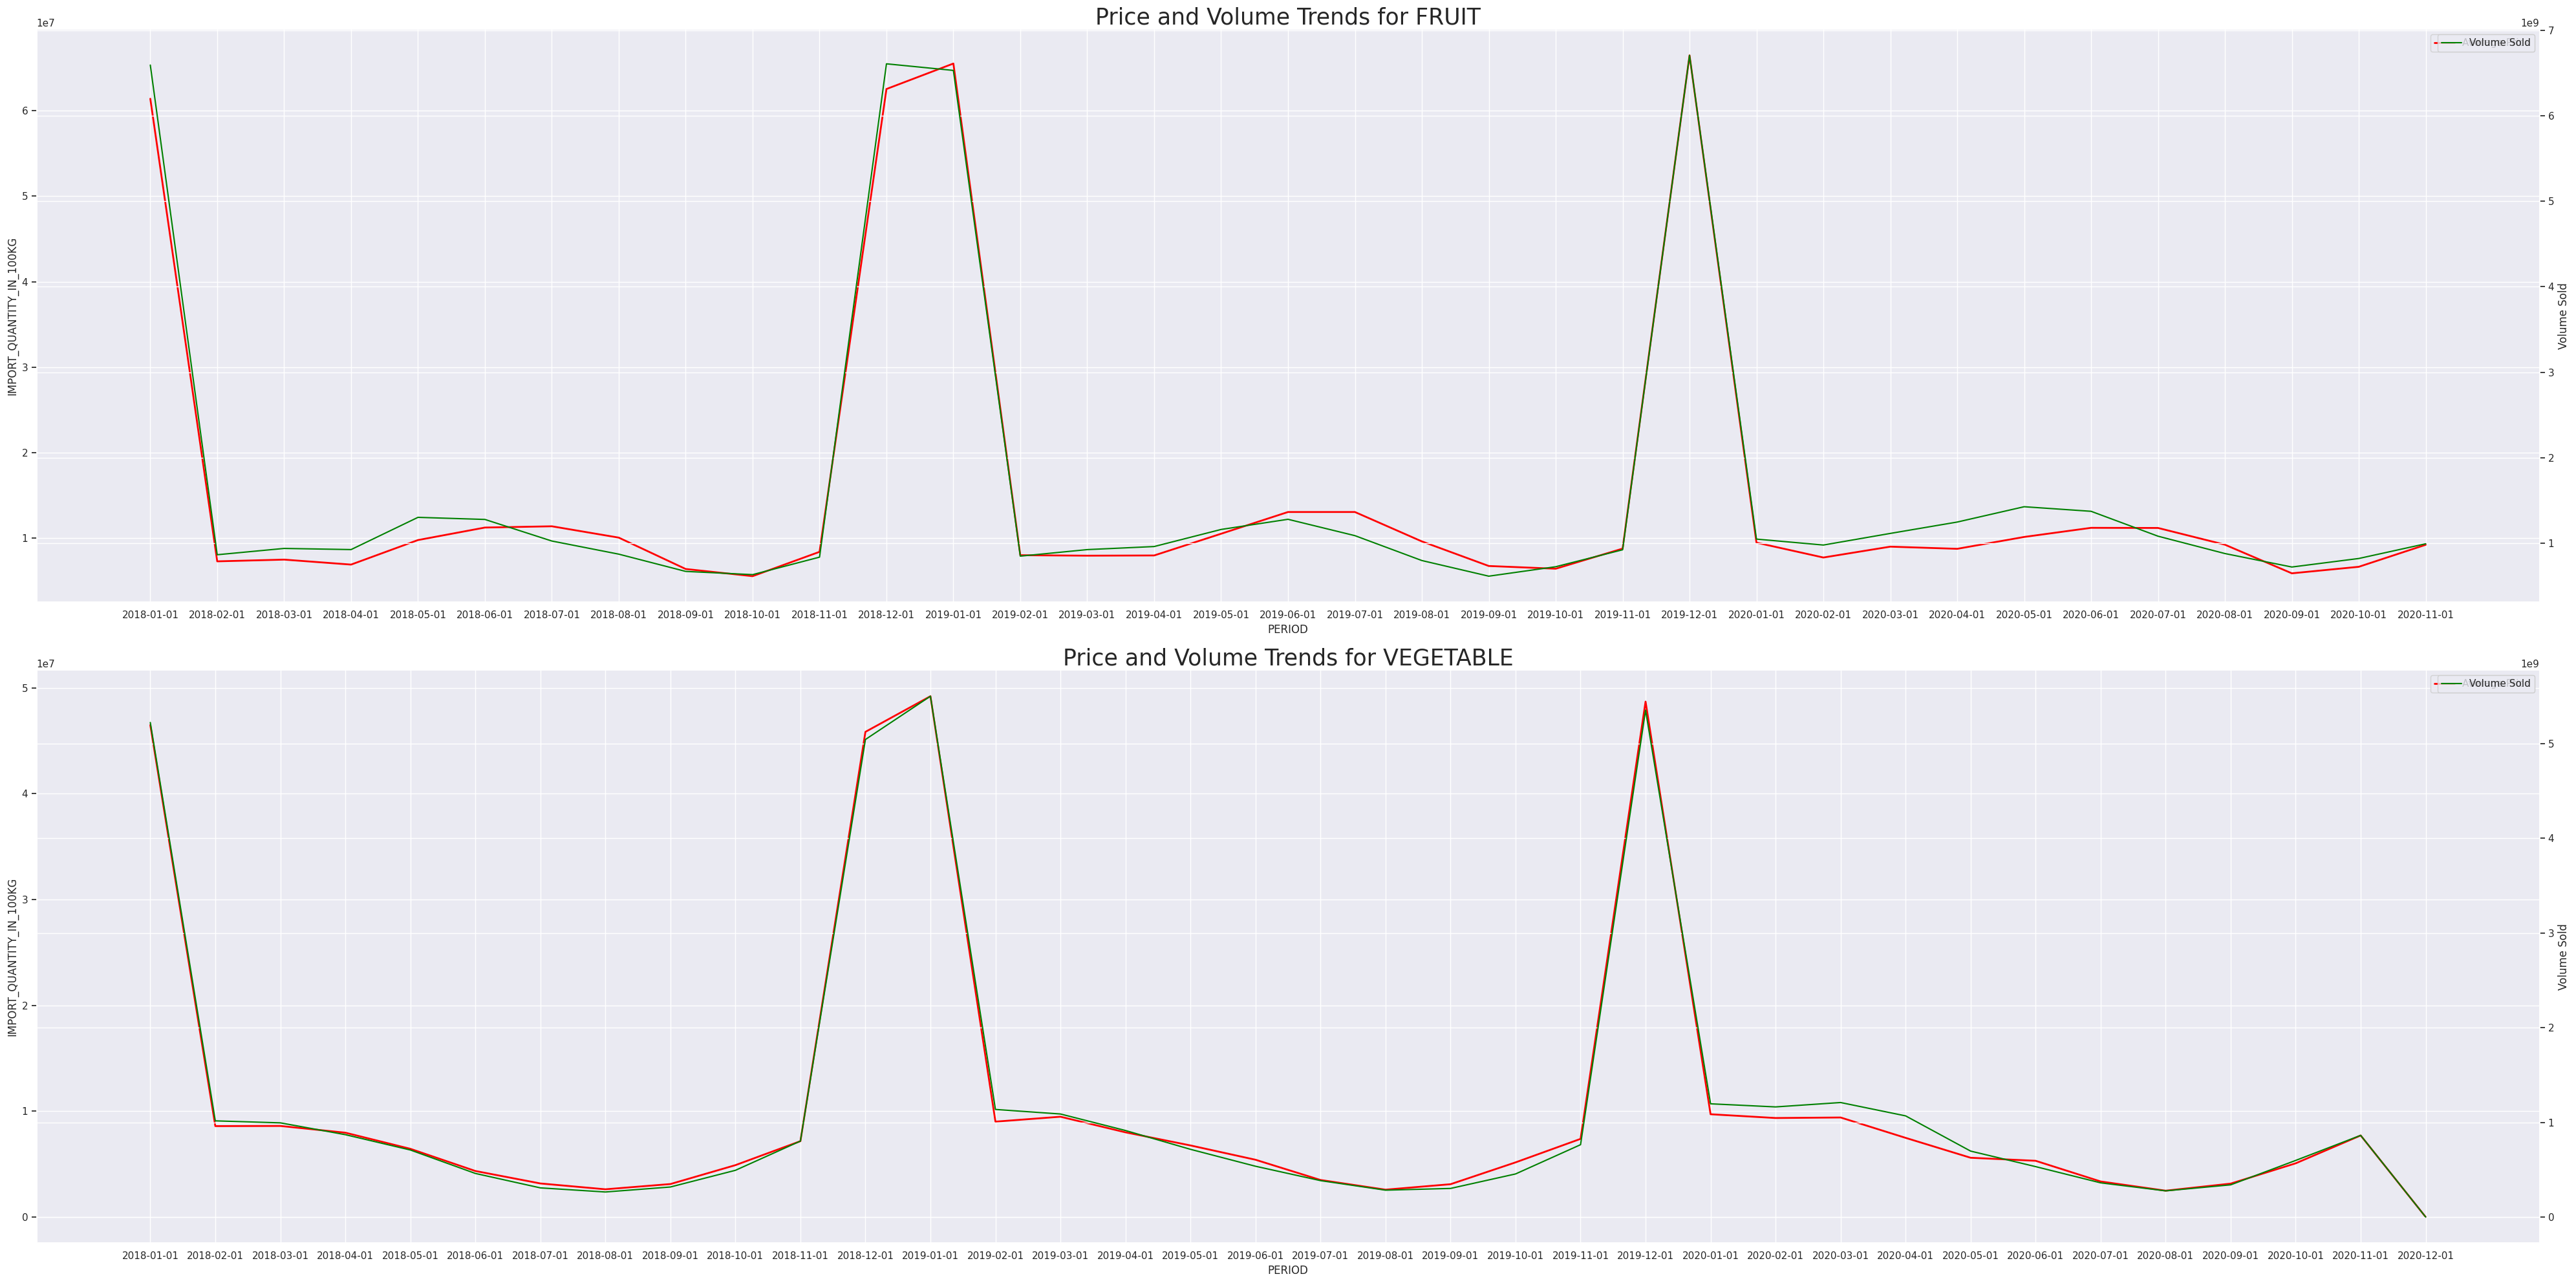

In [ ]:
# Grouping the data by 'familia', 'date' and calculating mean of price and sum of volume
grouped_data = data.groupby(['CATEGORY', 'PERIOD']).agg({ 'IMPORT_QUANTITY_IN_100KG': 'sum', 'IMPORT_VALUE_IN_EUROS': 'sum'}).reset_index()

# Identifying unique categories to plot for each
categories = grouped_data['CATEGORY'].unique()

# Setting up the plotting area
plt.figure(figsize=(40, 10 * len(categories)))
sns.set(style="darkgrid")

# Looping through each family to create a subplot
for i, category in enumerate(categories, 1):
    plt.subplot(len(categories), 1, i)
    category_data = grouped_data[grouped_data['CATEGORY'] == category]

    # Plotting price and volume trends
    sns.lineplot(x='PERIOD', y='IMPORT_QUANTITY_IN_100KG', data=category_data, label='Average Price', color='red',linewidth=2)
    ax2 = plt.gca().twinx()
    sns.lineplot(x='PERIOD', y='IMPORT_VALUE_IN_EUROS', data=category_data, label='Volume Sold', color='green', ax=ax2)

    # Setting plot titles and labels
    plt.title(f'Price and Volume Trends for {category}', fontsize=25)
    plt.xlabel('Date')
    plt.ylabel('Average Price')
    ax2.set_ylabel('Volume Sold')

    # Adding legends
    plt.gca().legend(loc='upper left')
    ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()



Here we can see the increase on the winter months. And we can see that the imports increased more than the previous years.

In [ ]:
peak_quantity =grouped_data['IMPORT_QUANTITY_IN_100KG'].max()
peak_value =grouped_data['IMPORT_VALUE_IN_EUROS'].max()
row_with_peak_quantity = grouped_data[grouped_data['IMPORT_QUANTITY_IN_100KG'] == peak_quantity]
row_with_peak_value = grouped_data[grouped_data['IMPORT_VALUE_IN_EUROS'] == peak_value]


The peak value from each is from the december 2019.

In [ ]:
dir_path = "/content/drive/MyDrive/mycolab/clear/"
DS6_clean = "DS6_Cleaned"
DS6 = pd.read_csv("/content/drive/MyDrive/mycolab/clear/owid-covid-data.csv",sep=',')
covid = pd.read_csv(dir_path+DS6_clean, sep='|')

#Accessing the year covid has started/ended
covid_start = covid["year"].min()
covid_end = covid["year"].max()

#Before Covid
before_covid = data[pd.to_datetime(data['PERIOD']).dt.year < covid_start]

#During Covid
during_covid = data[
    ( pd.to_datetime(data['PERIOD']) >= pd.to_datetime(DS6["date"].min())) &
    ( pd.to_datetime(data['PERIOD']) <= pd.to_datetime(DS6["date"].max()))
]

print(during_covid)


           PERIOD REPORTER                                            PRODUCT  \
68208  2020-01-01  Austria                                            Bananas   
68209  2020-01-01  Austria                                   Brussels sprouts   
68210  2020-01-01  Austria                                          Cucumbers   
68211  2020-01-01  Austria                                           Currants   
68212  2020-01-01  Austria                                       Dried apples   
...           ...      ...                                                ...   
95167  2020-12-01    Spain                 Potatoes for manufacture of starch   
95168  2020-12-01   Sweden  Fresh or chilled new potatoes from 1 January t...   
95169  2020-12-01   Sweden  Fresh or chilled new potatoes from 1 January t...   
95170  2020-12-01   Sweden                 Potatoes for manufacture of starch   
95171  2020-12-01   Sweden                 Potatoes for manufacture of starch   

        CATEGORY  EXPORT_QU

#During covid data

For fruits, we can see that there was a decrease in the import quantities and prices in the first month and then they both increased for the February.

In March when covid cases turned 100k from 16, imports have decreased and their values have increased. We can say that our statement is valid for this month.

The rest is similar to the first months but in May right when the new covid cases has decreased, the relation between quantity and value changes to (increasing,decreasing).


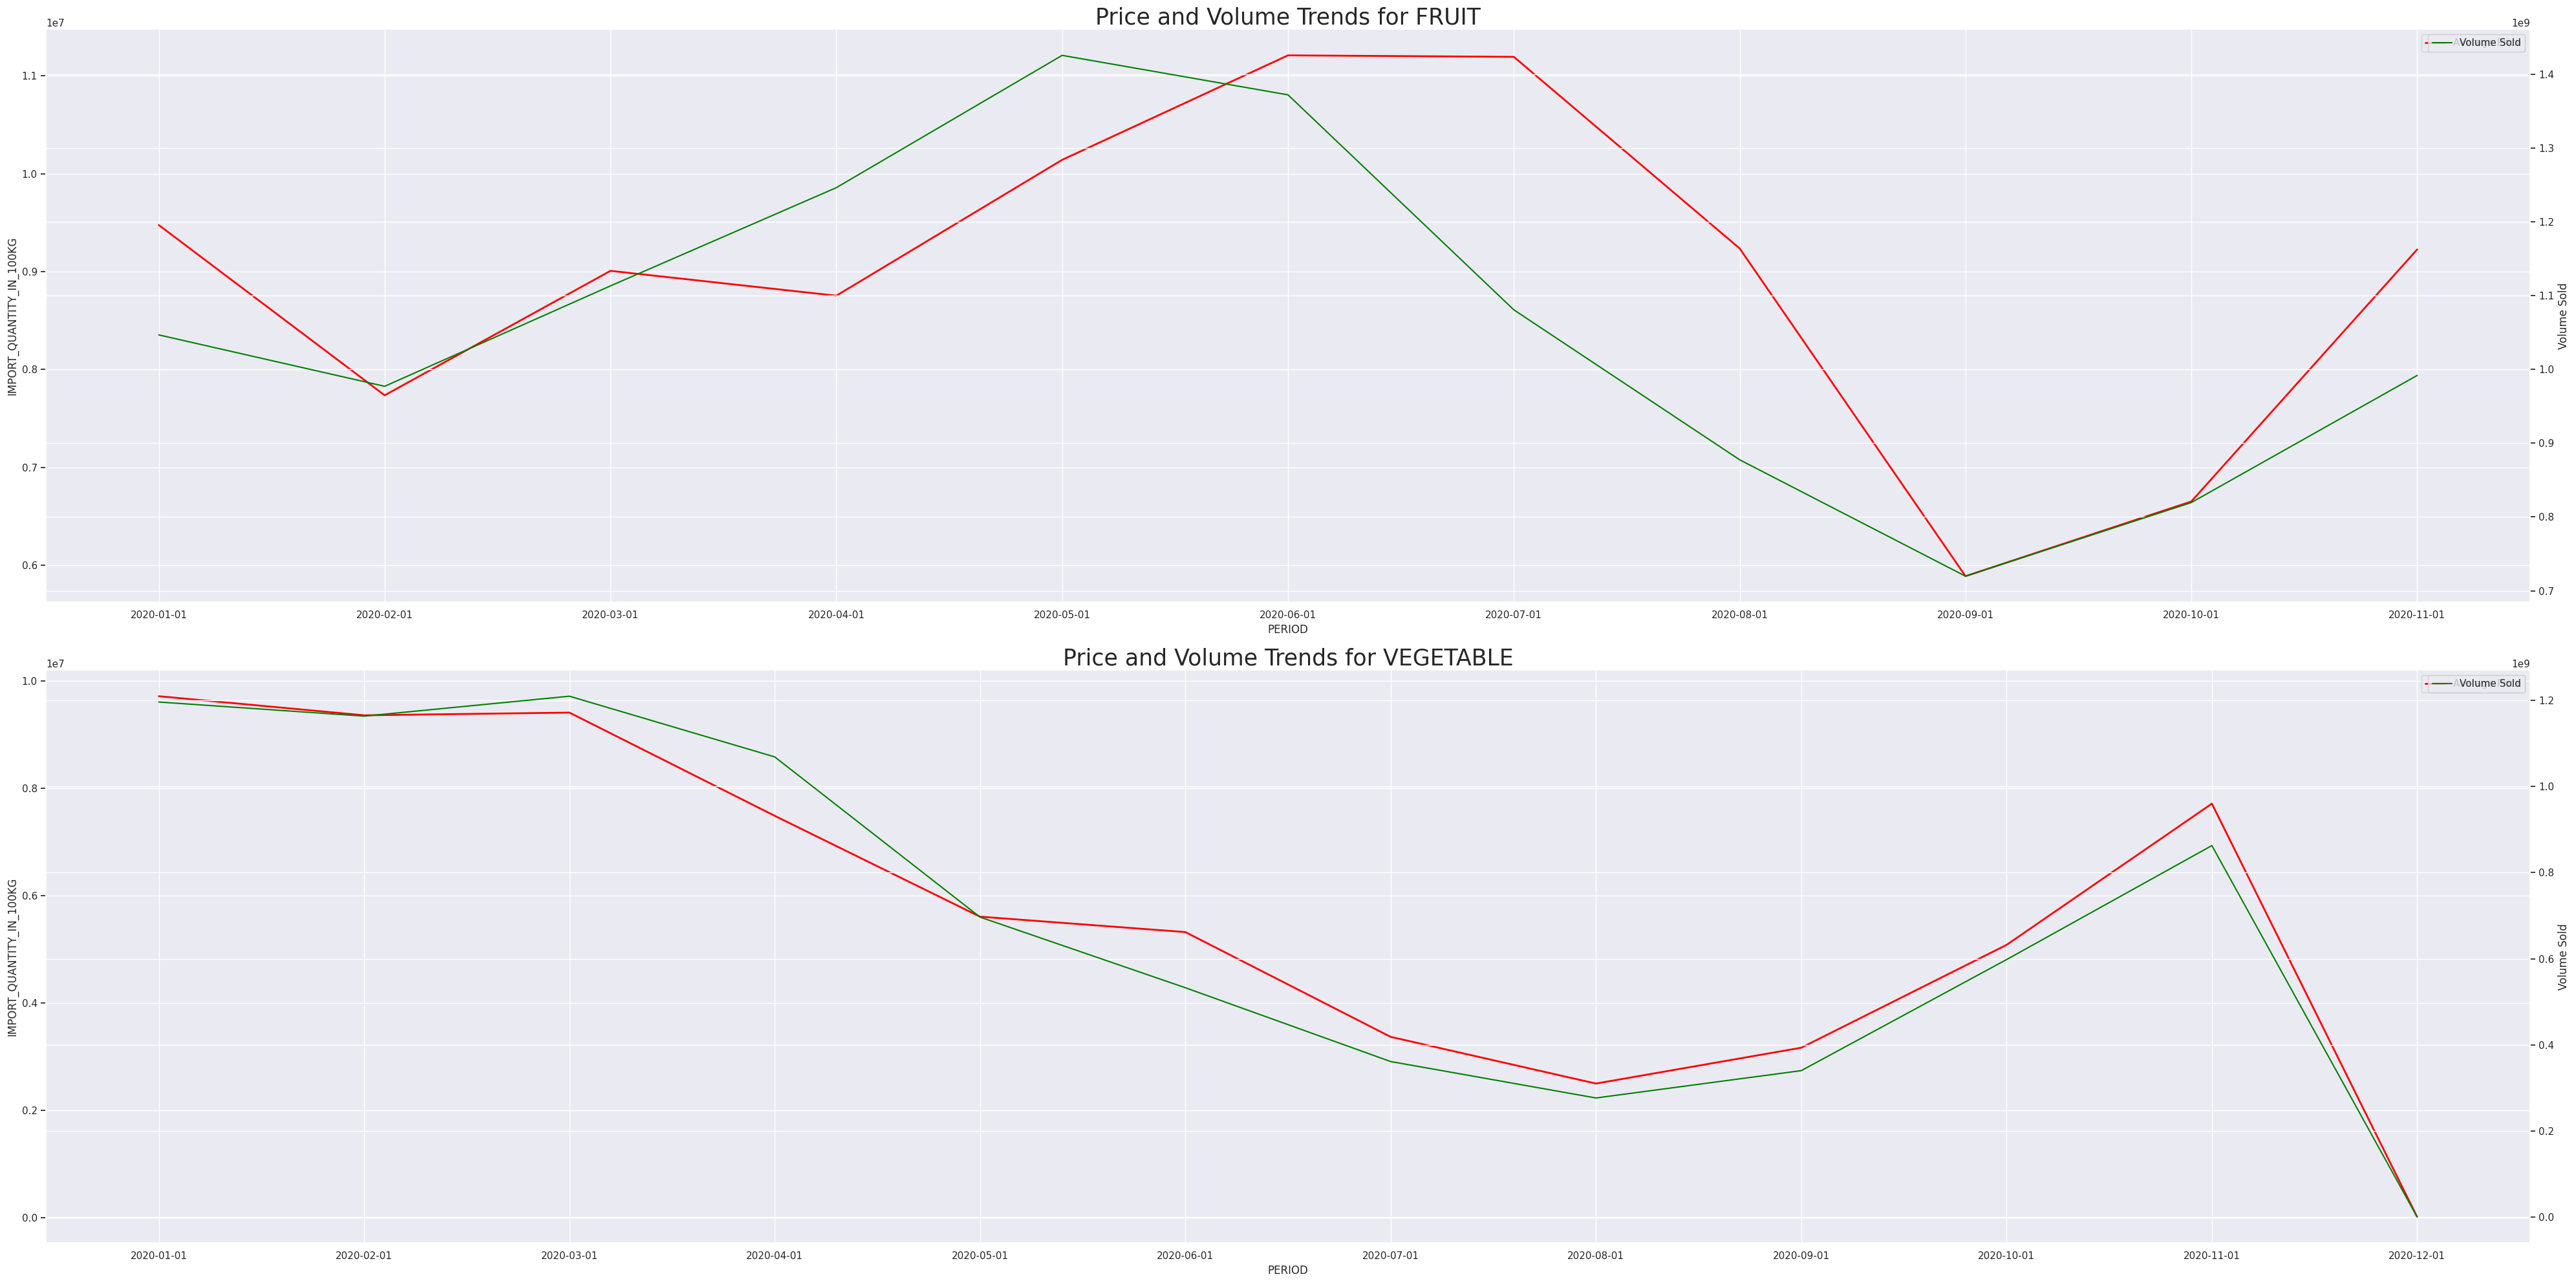

In [ ]:
# Grouping the data by 'familia', 'date' and calculating mean of price and sum of volume
grouped_data = during_covid.groupby(['CATEGORY', 'PERIOD']).agg({ 'IMPORT_QUANTITY_IN_100KG': 'sum', 'IMPORT_VALUE_IN_EUROS': 'sum'}).reset_index()

# Identifying unique categories to plot for each
categories = grouped_data['CATEGORY'].unique()

# Setting up the plotting area
plt.figure(figsize=(40, 10 * len(categories)))
sns.set(style="darkgrid")

# Looping through each family to create a subplot
for i, category in enumerate(categories, 1):
    plt.subplot(len(categories), 1, i)
    category_data = grouped_data[grouped_data['CATEGORY'] == category]

    # Plotting price and volume trends
    sns.lineplot(x='PERIOD', y='IMPORT_QUANTITY_IN_100KG', data=category_data, label='Average Price', color='red',linewidth=2)
    ax2 = plt.gca().twinx()
    sns.lineplot(x='PERIOD', y='IMPORT_VALUE_IN_EUROS', data=category_data, label='Volume Sold', color='green', ax=ax2)

    # Setting plot titles and labels
    plt.title(f'Price and Volume Trends for {category}', fontsize=25)
    plt.xlabel('Date')
    plt.ylabel('Average Price')
    ax2.set_ylabel('Volume Sold')

    # Adding legends
    plt.gca().legend(loc='upper left')
    ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

For vegetables, in first months the relation between quantity and values are more stable. They both increase or decrease together.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/mycolab/clear/owid-covid-data.csv",sep=',')


#Creating a new dataset for Spain
df_spain = df[df["location"]=='Spain']
df_spain.head()
df_spain = df_spain[['date','total_cases', 'new_cases']]

# Converting the 'date' column to datetime format
df_spain['date'] = pd.to_datetime(df_spain['date'])


# Grouping
aggregated_data = df_spain.groupby(['date']).agg({
    'new_cases': 'sum',
    'total_cases': 'last'
}).reset_index()


aggregated_data

,date,new_cases,total_cases
0,2020-01-03,0.0,NaN
1,2020-01-04,0.0,NaN
2,2020-01-05,0.0,NaN
3,2020-01-06,0.0,NaN
4,2020-01-07,0.0,NaN
...,...,...,...
1415,2023-11-18,0.0,13980340.0
1416,2023-11-19,0.0,13980340.0
1417,2023-11-20,0.0,13980340.0
1418,2023-11-21,0.0,13980340.0


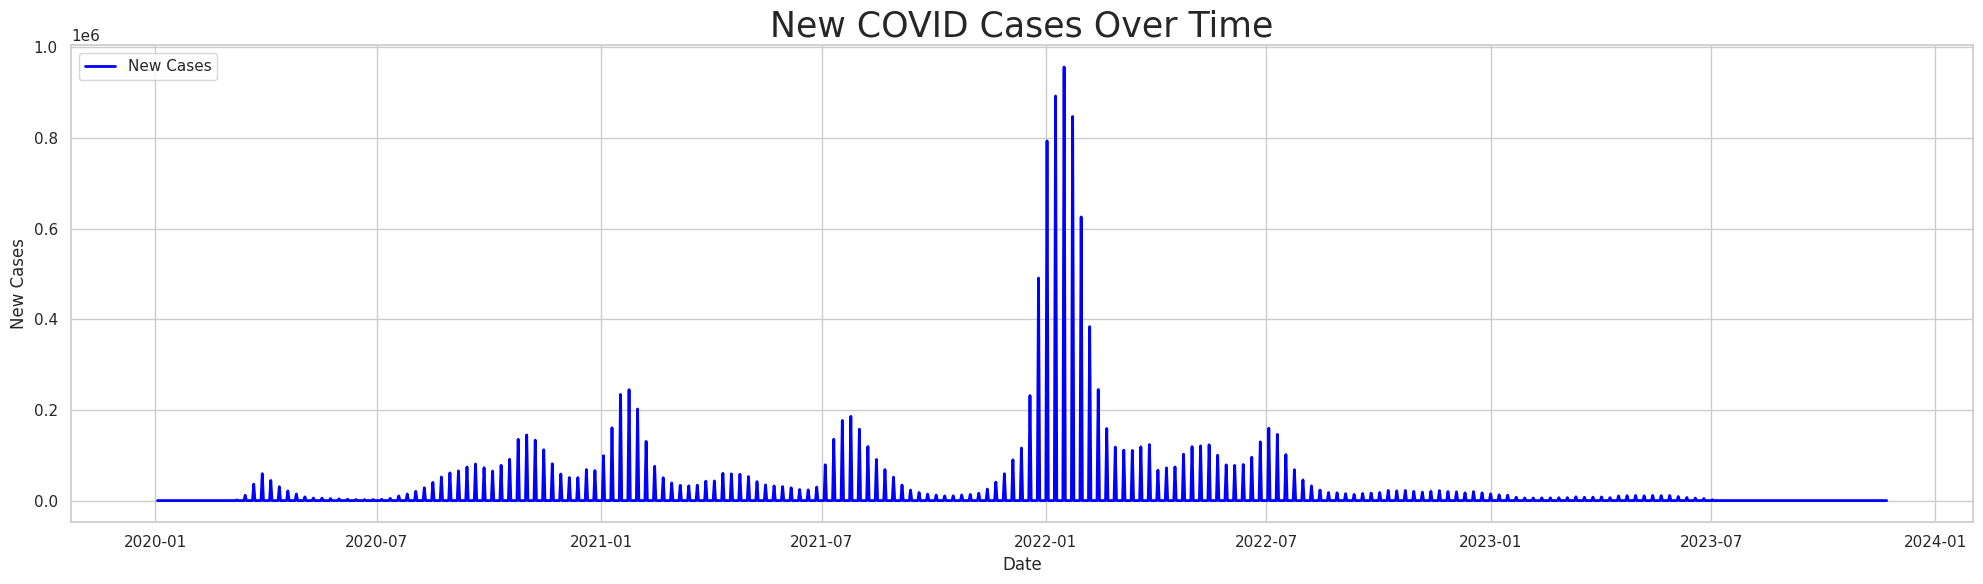

In [ ]:
# Setting up the plotting area
plt.figure(figsize=(20, 6))
sns.set(style="whitegrid")

sns.lineplot(x='date', y='new_cases', data=aggregated_data, label='New Cases', color='blue',linewidth=2)

# # Setting plot titles and labels
plt.title(f'New COVID Cases Over Time', fontsize=25)
plt.xlabel('Date')
plt.ylabel('New Cases')

# # Adding legends
plt.gca().legend(loc='upper left')

plt.tight_layout()
plt.show()

#Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


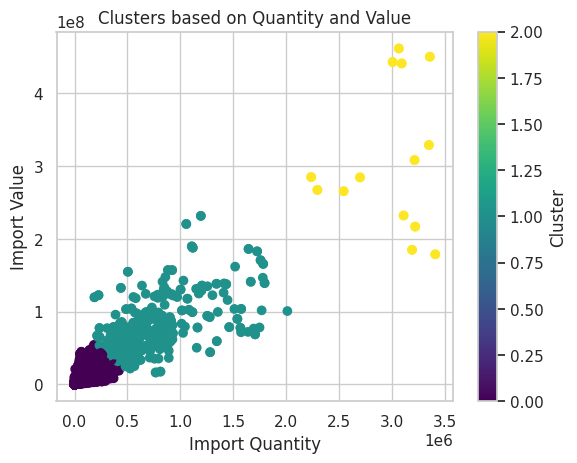

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = data[['IMPORT_QUANTITY_IN_100KG', 'IMPORT_VALUE_IN_EUROS']]

# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Applying K-means clustering
kmeans = KMeans(n_clusters=3)  # Choosing the number of clusters
kmeans.fit(scaled_features)
data['Cluster'] = kmeans.labels_ # Assigning clusters


plt.scatter(data['IMPORT_QUANTITY_IN_100KG'], data['IMPORT_VALUE_IN_EUROS'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Import Quantity')
plt.ylabel('Import Value')
plt.title('Clusters based on Quantity and Value')
plt.colorbar(label='Cluster')
plt.show()
